# Project - Natural Language Processing Project-2     PART-1
 by ARYAN JAIN


#### SUMMARY

<b>Context:</b>
    The objective of this project is to build a text classification model that analyses the customer's sentiments 
    based on their reviews in the IMDB database. 
    The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to
    analyse the sentiment of the customers.
    
    
<b>Data Description:</b>    
    The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). 
    Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). 
    For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the 
    most frequent word. 
    Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. 
    As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.
    

<b>Domain:</b>
 Digital content and entertainment industry
    
    
<b>Objectives:</b>
    Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.
 
<b>Key Tasks:</b>

     - Import and analyse the data set (imbd, 1000 most frequent words) 
     - Perform relevant sequence adding on the data
     - Perform data analysis: Print shape of features and labels, Print value of any one feature and it's label
     - Decode the feature value to get original sentence
     - Design, train, tune and test a sequential model
     - Use the designed model to print the prediction on any one sample.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the in-built IMDB dataset
from keras.datasets import imdb

### Import the data (imdb dataset)

In [2]:
# Most frequent 1000 words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

### Perform relevant sequence adding on the data

In [3]:
# Sequence adding on data 

    # First we have to decide a fixed length for each review
    # Then we need to either trim or pad every review to that size

In [4]:
# Let's investigate length of the first review
len(X_train[0])

218

In [5]:
# Let's get the length of all the Reviews in a list and then use it further to find the number of average words

In [6]:
# concatenate both X_train and X_test so that we can get the full set of 50,000 records

X = np.concatenate((X_train, X_test), axis=0)

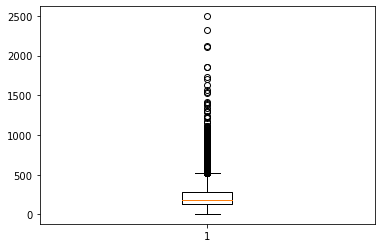

In [7]:
list_review_lengths = [len(x) for x in X]
plt.boxplot(list_review_lengths)
plt.show()

In [8]:
# Let's print and review review lengths

print ("Mean = %f" , np.mean(list_review_lengths))
print ("Std = %f" , np.std(list_review_lengths))
print ("Min = %f" , np.min(list_review_lengths))
print ("Max = %f" , np.max(list_review_lengths))

Mean = %f 234.75892
Std = %f 172.91149458735703
Min = %f 7
Max = %f 2494


In [9]:
# Mean review length = 234 
# Standard deviation = 172. 

# I will use total length = 450.

In [10]:
# Based on above analysis, let's pad to total length of 450

from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_450 = pad_sequences(X_train, maxlen=450)
X_test_450 = pad_sequences(X_test, maxlen=450)

### Print shape of features and labels

In [11]:
# Print shape of features and labels

In [12]:
X_train_450.shape, y_train.shape, X_test_450.shape, y_test.shape

((25000, 450), (25000,), (25000, 450), (25000,))

In [13]:
# Let's print one feature and it's label

In [14]:
X_test_450[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [15]:
y_test[0]

0

In [16]:
X_train_450[1000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [17]:
y_train[1000]

0

In [18]:
# Decoding the feature value to derive orignal sentence

In [19]:
# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict([(i, word) for (word, i) in word_index.items()])
# As per information on the web, indices are off by 3 because 0, 1, and 2 are reserved indices for "padding", 
# "Start of sequence" and "unknown"
# So, we need to take care of that while decoding.
# Decode the first sequence in the dataset
decoded_sequence = " ".join([inverted_word_index.get(i-3, '0') for i in X[0]])

In [20]:
print(decoded_sequence)

0 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert 0 is an amazing actor and now the same being director 0 father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for 0 and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also 0 to the two little boy's that played the 0 of norman and paul they were just brilliant children are often left out of the 0 list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [21]:
y_train[0] # 1 means the review is positive

1

In [22]:
decoded_sequence = " ".join([inverted_word_index.get(i-3, "0") for i in X[1000]])
print(decoded_sequence)

0 although i had seen 0 in a theater way back in 0 i couldn't remember anything of the plot except for vague images of kurt thomas running and fighting against a backdrop of stone walls and disappointment regarding the ending br br after reading some of the other reviews i picked up a copy of the newly released dvd to once again enter the world of 0 br br it turns out this is one of those films produced during the '80s that would go directly to video today the film stars champion 0 kurt thomas as jonathan 0 0 out of the blue to 0 the nation of 0 to enter and hopefully win the game a 0 0 0 by the khan who encourages his people by yelling what sounds like 0 power the goal of the mission involves the star wars defense system jonathan is trained in the martial arts by princess 0 who never speaks or leaves the house once trained tries to blend in with the locals by wearing a bright red 0 with 0 of blue and white needless to say 0 finds himself running and fighting for his life along the sto

In [23]:
y_train[1000] # 0 means the review is negative

0

In [24]:
# Now its time to design, train and tune our sequential model

In [25]:
# The problem statement recommends using first 20 words of the review, so I will set the max length to 20.

X_train_20 = pad_sequences(X_train, maxlen=20) 
X_test_20 = pad_sequences(X_test, maxlen=20)

In [26]:
X_train_20.shape, y_train.shape, X_test_20.shape, y_test.shape

((25000, 20), (25000,), (25000, 20), (25000,))

In [27]:
# Build and compile the sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

model = Sequential()
model.add(Embedding(10000, 32, input_length=20)) # use embedding vector size of 32 dimesions
model.add(Dropout(0.2))
model.add(LSTM(100)) # 100 LSTM units
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics="accuracy")
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            320000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# Splt dataset for testing

from sklearn.model_selection import train_test_split 
x_val_20, x_test_20, y_val_20, y_test_20 = train_test_split(X_test_20,y_test, test_size = 0.1, random_state = 7)
print(x_val_20.shape,y_val_20.shape)
print(x_test_20.shape,y_test_20.shape)

(22500, 20) (22500,)
(2500, 20) (2500,)


In [29]:
# Train and evaluate the model

# Fit the model
model.fit(X_train_20, y_train, validation_data=(x_val_20, y_val_20), epochs=20, batch_size=32, verbose=2) 

# Final evaluation of the model
scores = model.evaluate(x_val_20, y_val_20, verbose=0)

# print performance 
print(f"Accuracy: {scores[1]*100}")

Epoch 1/20
782/782 - 15s - loss: 0.5355 - accuracy: 0.7188 - val_loss: 0.4747 - val_accuracy: 0.7696
Epoch 2/20
782/782 - 13s - loss: 0.4166 - accuracy: 0.8082 - val_loss: 0.4749 - val_accuracy: 0.7693
Epoch 3/20
782/782 - 12s - loss: 0.3648 - accuracy: 0.8364 - val_loss: 0.5208 - val_accuracy: 0.7592
Epoch 4/20
782/782 - 13s - loss: 0.3153 - accuracy: 0.8632 - val_loss: 0.5309 - val_accuracy: 0.7628
Epoch 5/20
782/782 - 16s - loss: 0.2667 - accuracy: 0.8863 - val_loss: 0.6585 - val_accuracy: 0.7490
Epoch 6/20
782/782 - 16s - loss: 0.2232 - accuracy: 0.9077 - val_loss: 0.6744 - val_accuracy: 0.7476
Epoch 7/20
782/782 - 14s - loss: 0.1805 - accuracy: 0.9268 - val_loss: 0.7626 - val_accuracy: 0.7432
Epoch 8/20
782/782 - 13s - loss: 0.1519 - accuracy: 0.9412 - val_loss: 0.8330 - val_accuracy: 0.7476
Epoch 9/20
782/782 - 13s - loss: 0.1272 - accuracy: 0.9521 - val_loss: 0.9595 - val_accuracy: 0.7383
Epoch 10/20
782/782 - 14s - loss: 0.1062 - accuracy: 0.9578 - val_loss: 0.9346 - val_accura

In [30]:
# Let's use the model to predict few samples

In [31]:
# Predict

pred = model.predict(x_test_20[10])[0][0]
print(f"Positive : {pred}")
print(f"Negative : {1-pred}")

Positive : 0.06190726161003113
Negative : 0.9380927383899689


In [32]:
# Decoding original

decoded_sequence = " ".join([inverted_word_index.get(i-3, '0') for i in X_train[10]])
print(decoded_sequence)

0 french horror cinema has seen something of a revival over the last couple of years with great films such as inside and 0 romance 0 on to the scene 0 0 the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made 0 was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is 0 by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named 0 sent to prison for fraud he is put in a cell with three others the quietly insane 0 body building 0 marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old 0 after 0 part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black magi

In [33]:
y_test_20[10]

0

In [34]:
# Prediction: Negative, Label - Negative (seems correct)

In [35]:
pred = model.predict(x_test_20[100])[0][0]
print(f"Positive : {pred}")
print(f"Negative : {1-pred}")

Positive : 0.08814433217048645
Negative : 0.9118556678295135


In [36]:
# Decoding original

decoded_sequence = " ".join([inverted_word_index.get(i-3, '0') for i in X_train[100]])
print(decoded_sequence)

0 i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of 0 drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was 0 on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep 0 the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the 0 box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10


In [37]:
y_test_20[100]

0

In [38]:
# Prediction: Negative, Label - Negative (seems correct)

In [39]:
pred = model.predict(x_test_20[400])[0][0]
print(f"Positive : {pred}")
print(f"Negative : {1-pred}")

Positive : 0.5456298589706421
Negative : 0.4543701410293579


In [40]:
# Decoding original

decoded_sequence = " ".join([inverted_word_index.get(i-3, '0') for i in X_train[400]])
print(decoded_sequence)

0 in cold blood has to be 0 as first rate movie making even if the subject matter is about as grim as it gets in the world of make believe but film noir fans should definitely find this one a gripping piece of work based as it is on a true life crime spree br br it opens with 0 jones' music under the credits and 0 dramatic views of a highway bus heading toward kansas city effectively setting the mood of the film even before the credits end the b w photography of conrad hall does a superb job right from the start br br also clear from the start robert blake and scott wilson are natural born actors they do a great job of portraying free spirited buddies looking for the next thrill ever see a millionaire 0 in the electric hair hell no there are two kinds of rules in this world one for the rich and one for the poor says wilson taking a 0 of alcohol behind the wheel br br both are destined to cross the path of a farm family showing no mercy and leaving no witnesses behind br br blake 0 abou

In [41]:
y_test_20[400]

1

In [42]:
# Prediction: Negative, Label - Positive (that seems incorrect)

In [43]:
# Let's predict and validate based on decoded original

pred = model.predict(X_train[200])[0][0]
print(f"Positive : {pred}")
print(f"Negative : {1-pred}")

Positive : 0.9998973608016968
Negative : 0.00010263919830322266


In [44]:
# Decoding original

decoded_sequence = " ".join([inverted_word_index.get(i-3, '0') for i in X_train[200]])
print(decoded_sequence)

0 this is a bit long 2 hours 20 minutes but it had a a lot of the famous pearl buck novel in it in other words a lot of ground to cover br br it was soap 0 at times but had some visually dramatic moments too 0 off by a 0 attack at the end of the film that was astounding to view considering this film is about 70 years old the special effects crew on this film did a spectacular job br br paul muni and 0 rainer were award winning actors in their day and they don't disappoint here both giving powerful performances the only problem is credibility as all the 0 are played by 0 and some of them like walter connolly just don't look real i'd like to see a re make of this movie with all asian actors not for pc reasons but to simply make the story look and sound more credible


In [45]:
# Let's check label
y_train[200]

1

In [46]:
# The prediction (negative) appears corerct based on the decoded sequence

# END OF PART 1 